In [1]:
# Import Python packages 

import json 
import numpy as np
import pandas as pd 
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [3]:
# Read Json file into Dataframe 
file='world_bank_projects.json'

with open(file,'r') as json_file:
    json_data=json.load(json_file)
df=pd.read_json(file)

In [5]:
# Inspect the data 
t=df.head()
df.tail()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

Text(0.5, 0, 'Name of Country')

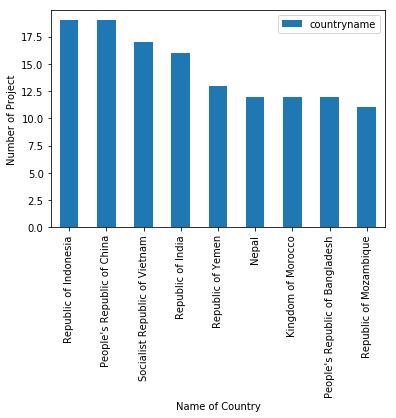

In [8]:
# question 1: find the top 10 countries with most projects
countries=df['countryname']
top_country_with_proj=countries.value_counts()
countries_df=pd.DataFrame(top_country_with_proj)
top10=countries_df.iloc[0:9,0:2].plot(kind='bar')
plt.ylabel('Number of Project')
plt.xlabel('Name of Country')

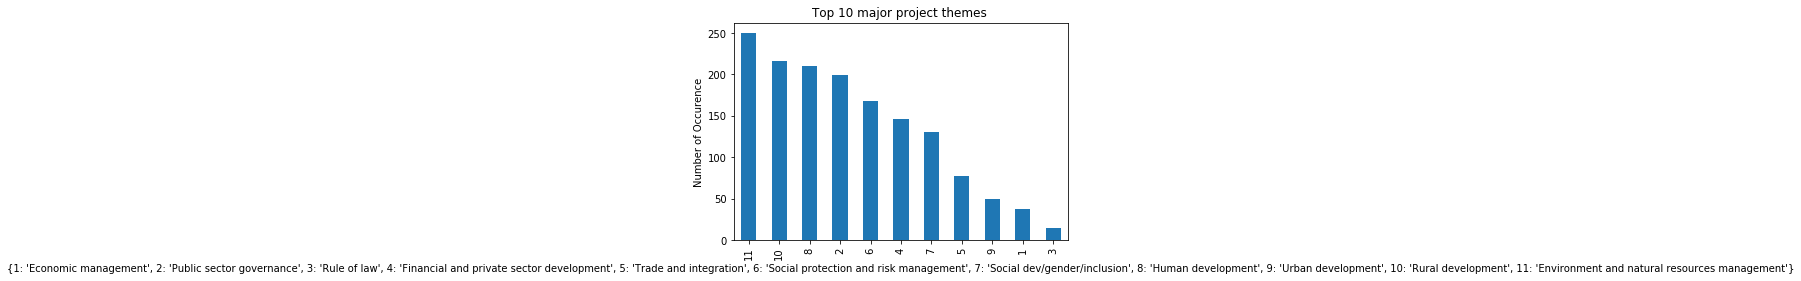

In [9]:
# question 2: Find the top 10 major project themes (using column 'mjtheme_namecode')
n=json_normalize(json_data,'mjtheme_namecode')
Code_name={1:'Economic management', 2:'Public sector governance',3:'Rule of law', 4:'Financial and private sector development',5:'Trade and integration', 6:'Social protection and risk management',7: 'Social dev/gender/inclusion', 8:'Human development',9: 'Urban development', 10:'Rural development',11:'Environment and natural resources management'}
count=n.code.value_counts()
count.plot(kind='bar')

plt.title('Top 10 major project themes ')
plt.xlabel(Code_name)
plt.ylabel('Number of Occurence')
plt.show()

In [12]:
# question 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in."
n=n.sort_values(['code','name'])
n.name[n.name=='']=np.nan
n=n.fillna(method='bfill')
print(n)

     code                 name
212     1  Economic management
363     1  Economic management
1024    1  Economic management
1114    1  Economic management
1437    1  Economic management
2       1  Economic management
88      1  Economic management
175     1  Economic management
204     1  Economic management
205     1  Economic management
220     1  Economic management
222     1  Economic management
223     1  Economic management
249     1  Economic management
357     1  Economic management
453     1  Economic management
454     1  Economic management
458     1  Economic management
497     1  Economic management
647     1  Economic management
648     1  Economic management
784     1  Economic management
803     1  Economic management
841     1  Economic management
900     1  Economic management
1010    1  Economic management
1045    1  Economic management
1056    1  Economic management
1057    1  Economic management
1078    1  Economic management
...   ...                  ...
597     